In [ ]:
types = ["age", "edu", "incom", "job", "sex"]
columns = ["年齡層", "教育程度類別", "年收入", "職業類別", "性別"]

for item, column in zip(types, columns):
    with open(f"six_{item}_2023.csv", "r", encoding="utf-8") as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            __insert_data(
                conn,
                tablename=item,
                values=[
                    row["年"],
                    row["月"],
                    row["地區"],
                    row["產業別"],
                    row[f"{columns}"],
                    row["信用卡交易筆數"],
                    row["信用卡交易金額"],
                ],
            )

[6.50251624e+12 6.50251624e+12 6.50251624e+12 ... 6.56814910e+12
 6.56814910e+12 6.56814910e+12]


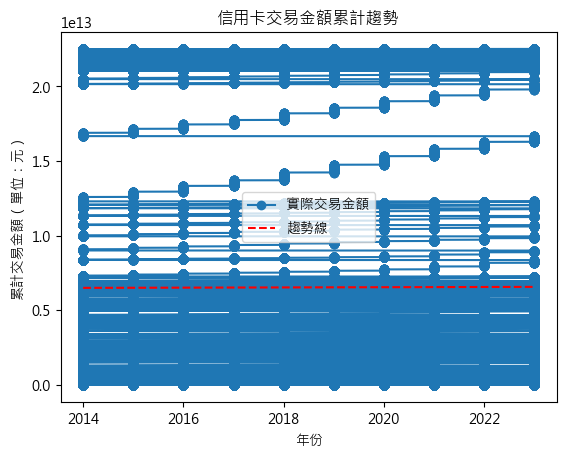

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 將十年的信用卡交易金額相加
df['累計交易金額'] = df['信用卡交易金額[新台幣]'].cumsum()

# 準備X（年份）和y（累計交易金額）的資料
X = np.array(df['年']).reshape(-1, 1)
y = np.array(df['累計交易金額'])

# 建立線性回歸模型
model = LinearRegression()

# 適應模型
model.fit(X, y)

# 生成預測
y_pred = model.predict(X)
print(y_pred)

# 繪製折線圖和趨勢線
plt.plot(df['年'], df['累計交易金額'], marker='o', linestyle='-', label='實際交易金額')
plt.plot(df['年'], y_pred, color='red', linestyle='--', label='趨勢線')

# 添加標籤
plt.title('信用卡交易金額累計趨勢')
plt.xlabel('年份')
plt.ylabel('累計交易金額（單位：元）')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()


In [26]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據地區分組
grouped_df = df.groupby('地區')

# 計算每個地區的「信用卡金額」的年成長率
for name, group in grouped_df:
    group['年成長率'] = (group['信用卡交易金額[新台幣]'].pct_change() * 100).fillna(0)

    # 可以將結果存儲到新的DataFrame或繪製圖表
    print(f"地區: {name}")
    print(group[['年', '月', '信用卡交易金額[新台幣]', '年成長率']])
    print("\n")


地區: 南投縣
           年  月  信用卡交易金額[新台幣]         年成長率
252252  2014  1         26821     0.000000
252253  2014  1       1578313  5784.616532
252254  2014  1       5520306   249.759902
252255  2014  1      10178812    84.388547
252256  2014  1      14568166    43.122459
...      ... ..           ...          ...
275179  2023  9      14302363   -13.813628
275180  2023  9       6905546   -51.717447
275181  2023  9       3406577   -50.668970
275182  2023  9        724855   -78.721896
275183  2023  9        387688   -46.515096

[22932 rows x 4 columns]


地區: 嘉義市
          年  月  信用卡交易金額[新台幣]         年成長率
22932  2014  1         93082     0.000000
22933  2014  1       2738338  2841.855568
22934  2014  1       8092427   195.523306
22935  2014  1      14934827    84.553126
22936  2014  1      21118032    41.401250
...     ... ..           ...          ...
45859  2023  9       7799572   -31.054226
45860  2023  9       4713413   -39.568312
45861  2023  9       1897742   -59.737413
45862  2023  9      

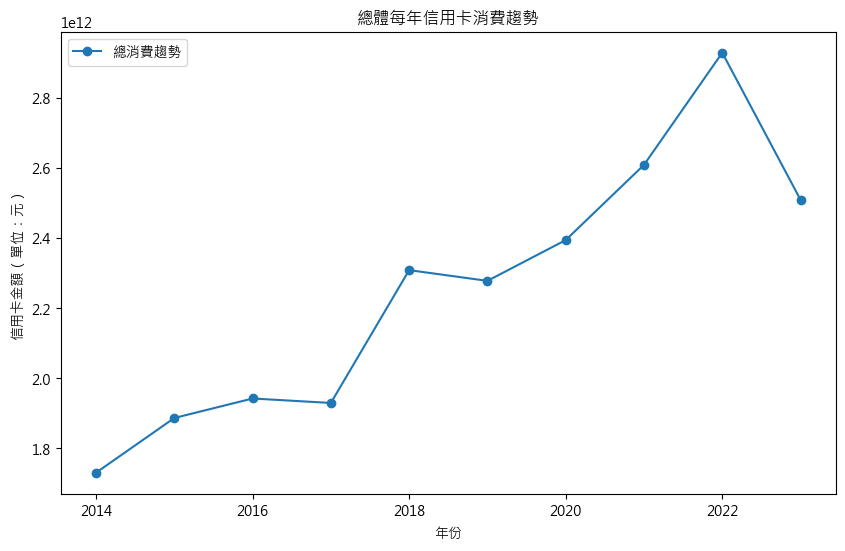

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('../age_trans.csv')

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製整體每年的信用卡消費趨勢
plt.figure(figsize=(10, 6))
plt.plot(total_by_year['年'], total_by_year['信用卡交易金額[新台幣]'], marker='o', linestyle='-', label='總消費趨勢')

# 添加標籤
plt.title('總體每年信用卡消費趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額（單位：元）')
plt.legend()



# 顯示圖表
plt.show()


posx and posy should be finite values
posx and posy should be finite values


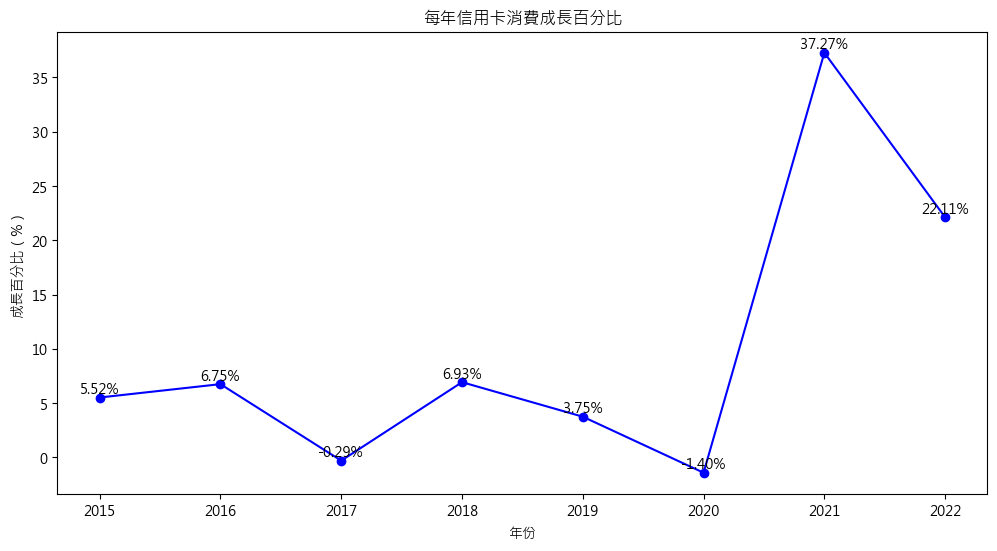

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../processed_dataset.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# 將每年的成長百分比列出
plt.figure(figsize=(12, 6))
plt.plot(total_by_year['年'], total_by_year['成長百分比'], marker='o', linestyle='-', color='blue')
plt.title('每年信用卡消費成長百分比')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')

# 顯示成長百分比數值
for i, value in enumerate(total_by_year['成長百分比']):
    plt.text(total_by_year['年'][i], value, f'{value:.2f}%', ha='center', va='bottom')

# 顯示圖表
plt.show()


In [30]:
# Calculate average growth rate from available data
average_growth_rate = total_by_year['成長百分比'].mean()

# Estimate growth for 2023
estimated_growth_2023 = total_by_year['信用卡交易金額[新台幣]'].iloc[-1] * (1 + average_growth_rate / 100)

print(f"Estimated growth rate for 2023: {average_growth_rate:.2f}%")
print(f"Estimated total credit card transactions in 2023: {estimated_growth_2023:.2f} 新台幣")


Estimated growth rate for 2023: 10.08%
Estimated total credit card transactions in 2023: 1925210183926.92 新台幣


c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


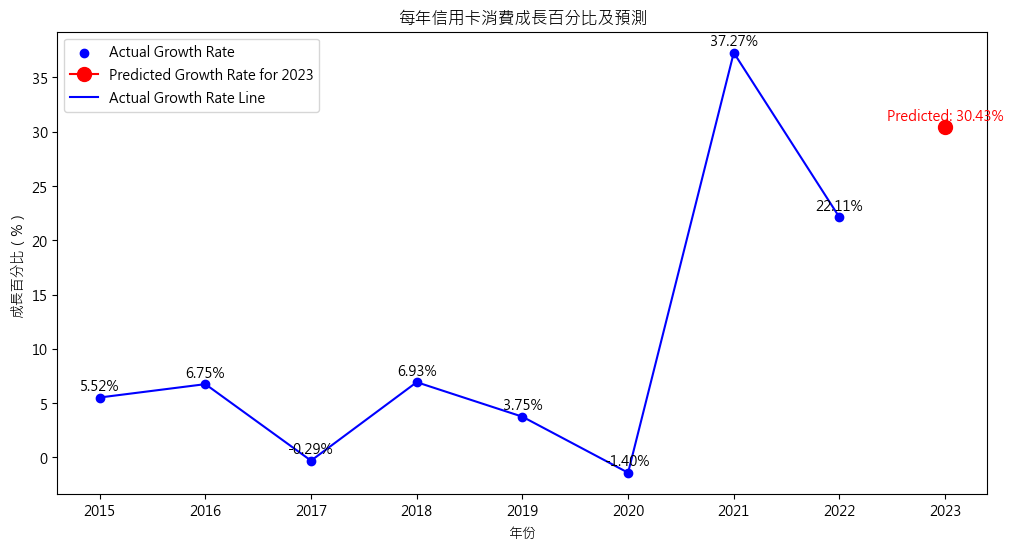

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../processed_dataset.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# Drop NaN values resulting from percentage change
total_by_year = total_by_year.dropna()

# 以年份作為特徵，成長百分比作為目標值
X = total_by_year[['年']]
y = total_by_year['成長百分比']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測2023年的成長百分比
predicted_growth_2023 = model.predict([[2023]])[0]

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Growth Rate')
plt.plot([2023], [predicted_growth_2023], marker='o', markersize=10, color='red', label='Predicted Growth Rate for 2023')
plt.plot(X, y, linestyle='-', color='blue', label='Actual Growth Rate Line')

# 標示每年的成長百分比
for i, txt in enumerate(y):
    plt.annotate(f'{txt:.2f}%', (X.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

# 標示預測值
plt.annotate(f'Predicted: {predicted_growth_2023:.2f}%', (2023, predicted_growth_2023), textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.title('每年信用卡消費成長百分比及預測')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')
plt.legend()
plt.show()


c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


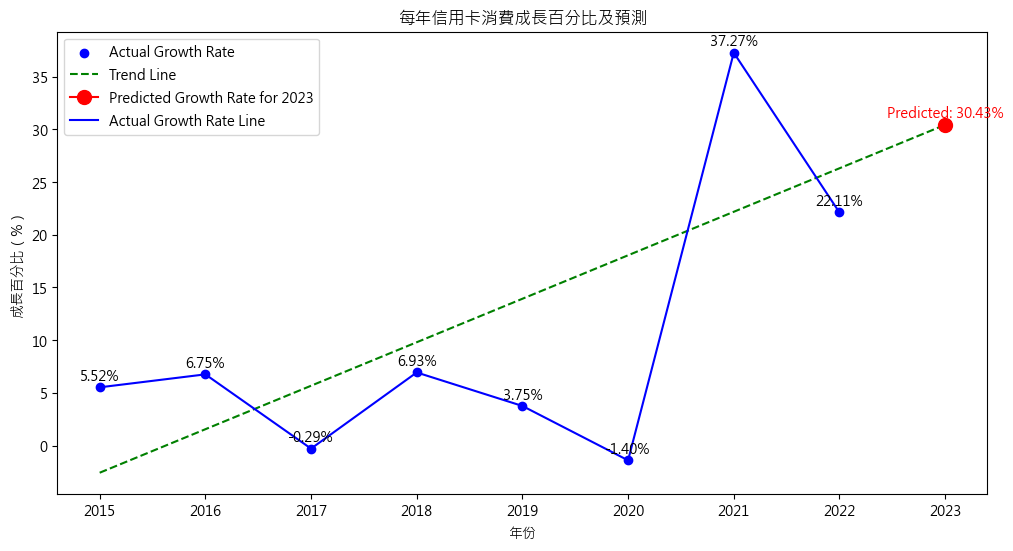

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# 讀取CSV檔案
df = pd.read_csv('../processed_dataset.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# Drop NaN values resulting from percentage change
total_by_year = total_by_year.dropna()

# 以年份作為特徵，成長百分比作為目標值
X = total_by_year[['年']]
y = total_by_year['成長百分比']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測2023年的成長百分比
predicted_growth_2023 = model.predict([[2023]])[0]

# 預測整個年份範圍的成長百分比
X_range = np.arange(total_by_year['年'].min(), 2024).reshape(-1, 1)
predicted_trend = model.predict(X_range)

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Growth Rate')
plt.plot(X_range, predicted_trend, linestyle='--', color='green', label='Trend Line')
plt.plot([2023], [predicted_growth_2023], marker='o', markersize=10, color='red', label='Predicted Growth Rate for 2023')
plt.plot(X, y, linestyle='-', color='blue', label='Actual Growth Rate Line')

# 標示每年的成長百分比
for i, txt in enumerate(y):
    plt.annotate(f'{txt:.2f}%', (X.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# 標示預測值
plt.annotate(f'Predicted: {predicted_growth_2023:.2f}%', (2023, predicted_growth_2023), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

plt.title('每年信用卡消費成長百分比及預測')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')
plt.legend()
plt.show()


c:\GitHub\ctest\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\GitHub\ctest\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


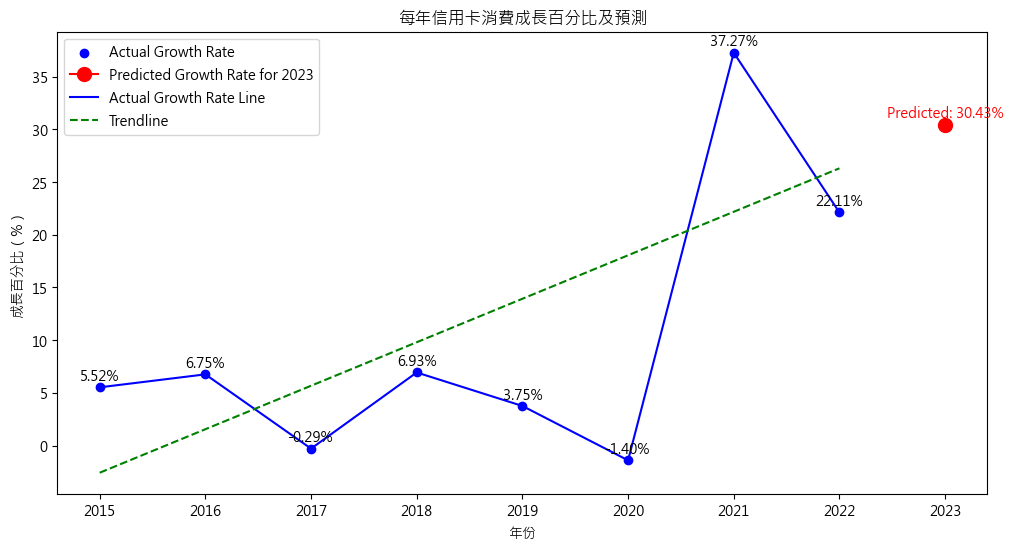

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('../processed_dataset.csv')

# 排除2023年的資料
df = df[df['年'] < 2023]

# 根據年份分組，計算每年的信用卡消費總額
total_by_year = df.groupby('年')['信用卡交易金額[新台幣]'].sum().reset_index()

# 計算每年相對於前一年的成長百分比
total_by_year['成長百分比'] = total_by_year['信用卡交易金額[新台幣]'].pct_change() * 100

# Drop NaN values resulting from percentage change
total_by_year = total_by_year.dropna()

# 以年份作為特徵，成長百分比作為目標值
X = total_by_year[['年']]
y = total_by_year['成長百分比']

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測2023年的成長百分比
predicted_growth_2023 = model.predict([[2023]])[0]

# Get the model coefficients
slope = model.coef_[0]
intercept = model.intercept_

# 繪製預測結果和趨勢線
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Growth Rate')
plt.plot([2023], [predicted_growth_2023], marker='o', markersize=10, color='red', label='Predicted Growth Rate for 2023')
plt.plot(X, y, linestyle='-', color='blue', label='Actual Growth Rate Line')

# 標示每年的成長百分比
for i, txt in enumerate(y):
    plt.annotate(f'{txt:.2f}%', (X.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

# 標示預測值
plt.annotate(f'Predicted: {predicted_growth_2023:.2f}%', (2023, predicted_growth_2023), textcoords="offset points", xytext=(0,5), ha='center', color='red')

# 繪製趨勢線
plt.plot(X, slope * X + intercept, linestyle='--', color='green', label='Trendline')

plt.title('每年信用卡消費成長百分比及預測')
plt.xlabel('年份')
plt.ylabel('成長百分比（%）')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv("../six_age.csv")

# 使用 groupby 函數將資料按照產業別進行分組
grouped_df = df.groupby('產業別')

# 計算各產業別的金額總和
sum_by_industry = grouped_df['信用卡交易金額'].sum()

# 顯示結果
print(sum_by_industry)


In [ ]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv("../six_age.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額': 'sum', '信用卡交易筆數': 'sum'})

# 顯示結果
result



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取 CSV 檔案
df = pd.read_csv("../six_cities.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'})

# 將索引重置，以將 '產業別', '年', '月' 移到欄位
result = result.reset_index()

# 進行標準化
std = StandardScaler()
result1 = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']]
arr = std.fit_transform(result1)
result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']] = arr

# 計算皮爾森相關係數
correlation_matrix = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']].corr(method='pearson')

correlation_matrix


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取 CSV 檔案
df = pd.read_csv("../six_cities.csv")

# 使用 groupby 函數將資料按照產業別、年和月進行分組
grouped_df = df.groupby(['產業別', '年', '月'])

# 計算各產業別的金額總和和信用卡交易筆數
result = grouped_df.agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'})

# 將索引重置，以將 '產業別', '年', '月' 移到欄位
result = result.reset_index()

# 進行標準化
std = StandardScaler()
result1 = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']]
arr = std.fit_transform(result1)
result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']] = arr
print(result)

# 計算皮爾森相關係數
correlation_matrix = result[['年', '月', '信用卡交易金額[新台幣]', '信用卡交易筆數']].corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True, )


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

df = pd.read_csv("../modified_six_cities.csv")
df = df[(df["產業別"] != "其他")]
dict1 = {'男性':1, '女性':2}
dict2 = {'臺北市':1, '新北市':2, '桃園市':3, '臺中市':4, '臺南市':5, '高雄市':6}
dict3 = {'食':1, '衣':2, '住':3, '行':4, '文教康樂':5, '百貨':6}
df['性別'].replace(dict1, inplace=True)
df['地區'].replace(dict2, inplace=True)
df['產業別'].replace(dict3, inplace=True)

df

In [ ]:
km = KMeans(n_clusters=5)  #n_clusters = ? 設定分?群
km.fit(df)
km.labels_

In [ ]:
df['類別'] = km.labels_
df

# 線性回歸

In [ ]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 儲存處理後的資料
df_six_cities.to_csv("processed_dataset.csv", index=False)

In [ ]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他") & (df["年齡層"] != "未滿20歲")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 儲存處理後的資料
df_six_cities.to_csv("processed_dataset_no20.csv", index=False)

In [ ]:
import pandas as pd

# 讀取資料集
df = pd.read_csv("../age_trans.csv")

# 排除產業別為 "其他"
df = df[(df["產業別"] != "其他")]

# 保留六都的資料，假設六都的地區為 ["台北", "新北", "桃園", "台中", "台南", "高雄"]
six_cities = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市"]
df_six_cities = df[df["地區"].isin(six_cities)]

# 將信用卡交易金額以千萬為單位
df_six_cities["信用卡交易金額[新台幣]"] = df_six_cities["信用卡交易金額[新台幣]"] / 1e7

# 信用卡筆數以萬為單位
df_six_cities["信用卡交易筆數"] = df_six_cities["信用卡交易筆數"] / 1e4

# 儲存處理後的資料
df_six_cities.to_csv("processed.csv", index=False)

In [5]:
df = pd.read_csv("../processed_dataset.csv")
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,高雄市,衣,女性,未滿20歲,275,483277
1,2014,1,高雄市,衣,女性,20(含)-25歲,6653,14861538
2,2014,1,高雄市,衣,女性,25(含)-30歲,15975,37941915
3,2014,1,高雄市,衣,女性,30(含)-35歲,28644,69910025
4,2014,1,高雄市,衣,女性,35(含)-40歲,34139,81103642
...,...,...,...,...,...,...,...,...
117931,2023,9,桃園市,行,男性,60(含)-65歲,58639,168066153
117932,2023,9,桃園市,行,男性,65(含)-70歲,33620,101404399
117933,2023,9,桃園市,行,男性,70(含)-75歲,15637,46138814
117934,2023,9,桃園市,行,男性,75(含)-80歲,3929,11460588


In [6]:
from sklearn.preprocessing import LabelEncoder

# Assuming "地區" is a categorical variable in your dataframe
le = LabelEncoder()
df['地區_encoded'] = le.fit_transform(df['地區'])

# Display the updated dataframe
print(df[['地區', '地區_encoded']])


         地區  地區_encoded
0       高雄市           5
1       高雄市           5
2       高雄市           5
3       高雄市           5
4       高雄市           5
...     ...         ...
117931  桃園市           1
117932  桃園市           1
117933  桃園市           1
117934  桃園市           1
117935  桃園市           1

[117936 rows x 2 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the dataframe to avoid modifying the original dataframe
df_encoded = df.copy()

# Encode the "地區" column
le_region = LabelEncoder()
df_encoded['地區_encoded'] = le_region.fit_transform(df_encoded['地區'])

# Encode the "產業" column
le_industry = LabelEncoder()
df_encoded['產業_encoded'] = le_industry.fit_transform(df_encoded['產業別'])

# Encode the "性別" column
le_gender = LabelEncoder()
df_encoded['性別_encoded'] = le_gender.fit_transform(df_encoded['性別'])

# Encode the "年齡層" column
le_age_group = LabelEncoder()
df_encoded['年齡層_encoded'] = le_age_group.fit_transform(df_encoded['年齡層'])

# Save the updated dataframe to a CSV file
df_encoded.to_csv("processed_dataset_encoded.csv", index=False)

# Display the updated dataframe
print(df_encoded[['地區_encoded', '產業_encoded', '性別_encoded', '年齡層_encoded']])

df_encoded


        地區_encoded  產業_encoded  性別_encoded  年齡層_encoded
0                5           4           0           13
1                5           4           0            0
2                5           4           0            1
3                5           4           0            2
4                5           4           0            3
...            ...         ...         ...          ...
117931           1           3           1            8
117932           1           3           1            9
117933           1           3           1           10
117934           1           3           1           11
117935           1           3           1           12

[117936 rows x 4 columns]


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,高雄市,衣,女性,未滿20歲,275,483277,5,4,0,13
1,2014,1,高雄市,衣,女性,20(含)-25歲,6653,14861538,5,4,0,0
2,2014,1,高雄市,衣,女性,25(含)-30歲,15975,37941915,5,4,0,1
3,2014,1,高雄市,衣,女性,30(含)-35歲,28644,69910025,5,4,0,2
4,2014,1,高雄市,衣,女性,35(含)-40歲,34139,81103642,5,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
117931,2023,9,桃園市,行,男性,60(含)-65歲,58639,168066153,1,3,1,8
117932,2023,9,桃園市,行,男性,65(含)-70歲,33620,101404399,1,3,1,9
117933,2023,9,桃園市,行,男性,70(含)-75歲,15637,46138814,1,3,1,10
117934,2023,9,桃園市,行,男性,75(含)-80歲,3929,11460588,1,3,1,11


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the dataframe to avoid modifying the original dataframe
df_encoded = df.copy()

# Encode the "地區" column
le_region = LabelEncoder()
df_encoded['地區_encoded'] = le_region.fit_transform(df_encoded['地區'])

# Encode the "產業" column
le_industry = LabelEncoder()
df_encoded['產業_encoded'] = le_industry.fit_transform(df_encoded['產業別'])

# Encode the "性別" column
le_gender = LabelEncoder()
df_encoded['性別_encoded'] = le_gender.fit_transform(df_encoded['性別'])

# Encode the "年齡層" column
le_age_group = LabelEncoder()
df_encoded['年齡層_encoded'] = le_age_group.fit_transform(df_encoded['年齡層'])

# Drop the original categorical columns
df_encoded = df_encoded.drop(['地區', '產業別', '性別', '年齡層'], axis=1)

# Save the updated dataframe to a CSV file
df_encoded.to_csv("processed_dataset_encoded.csv", index=False)

# Display the updated dataframe
print(df_encoded)
df_encoded


           年  月  信用卡交易筆數  信用卡交易金額[新台幣]  地區_encoded  產業_encoded  性別_encoded  \
0       2014  1      275        483277           5           4           0   
1       2014  1     6653      14861538           5           4           0   
2       2014  1    15975      37941915           5           4           0   
3       2014  1    28644      69910025           5           4           0   
4       2014  1    34139      81103642           5           4           0   
...      ... ..      ...           ...         ...         ...         ...   
117931  2023  9    58639     168066153           1           3           1   
117932  2023  9    33620     101404399           1           3           1   
117933  2023  9    15637      46138814           1           3           1   
117934  2023  9     3929      11460588           1           3           1   
117935  2023  9     1465       4755361           1           3           1   

        年齡層_encoded  
0                13  
1                 0

,年,月,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,275,483277,5,4,0,13
1,2014,1,6653,14861538,5,4,0,0
2,2014,1,15975,37941915,5,4,0,1
3,2014,1,28644,69910025,5,4,0,2
4,2014,1,34139,81103642,5,4,0,3
...,...,...,...,...,...,...,...,...
117931,2023,9,58639,168066153,1,3,1,8
117932,2023,9,33620,101404399,1,3,1,9
117933,2023,9,15637,46138814,1,3,1,10
117934,2023,9,3929,11460588,1,3,1,11


In [9]:
df = pd.read_csv('./processed_dataset_encoded.csv')
df

,年,月,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,275,483277,5,4,0,13
1,2014,1,6653,14861538,5,4,0,0
2,2014,1,15975,37941915,5,4,0,1
3,2014,1,28644,69910025,5,4,0,2
4,2014,1,34139,81103642,5,4,0,3
...,...,...,...,...,...,...,...,...
117931,2023,9,58639,168066153,1,3,1,8
117932,2023,9,33620,101404399,1,3,1,9
117933,2023,9,15637,46138814,1,3,1,10
117934,2023,9,3929,11460588,1,3,1,11


In [10]:
from sklearn.preprocessing import RobustScaler

# Assuming you have numerical columns in your dataframe
numerical_columns = ['信用卡交易金額[新台幣]', '信用卡交易筆數', '地區_encoded', '產業_encoded', '性別_encoded', '年齡層_encoded']

# Create a copy of the dataframe to avoid modifying the original dataframe
df_scaled = df.copy()

# Use RobustScaler to scale numerical columns
scaler = RobustScaler()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

# Display the scaled dataframe
df_scaled


,年,月,信用卡交易筆數,信用卡交易金額[新台幣],地區_encoded,產業_encoded,性別_encoded,年齡層_encoded
0,2014,1,-0.303028,-0.404936,0.833333,0.500000,-0.5,0.928571
1,2014,1,-0.161120,-0.243746,0.833333,0.500000,-0.5,-0.928571
2,2014,1,0.046290,0.015001,0.833333,0.500000,-0.5,-0.785714
3,2014,1,0.328170,0.373386,0.833333,0.500000,-0.5,-0.642857
4,2014,1,0.450431,0.498874,0.833333,0.500000,-0.5,-0.500000
...,...,...,...,...,...,...,...,...
117931,2023,9,0.995545,1.473784,-0.500000,0.166667,0.5,0.214286
117932,2023,9,0.438883,0.726460,-0.500000,0.166667,0.5,0.357143
117933,2023,9,0.038770,0.106894,-0.500000,0.166667,0.5,0.500000
117934,2023,9,-0.221728,-0.281873,-0.500000,0.166667,0.5,0.642857


Mean Squared Error: 18788229435.549854
R-squared: 0.5559494636004163


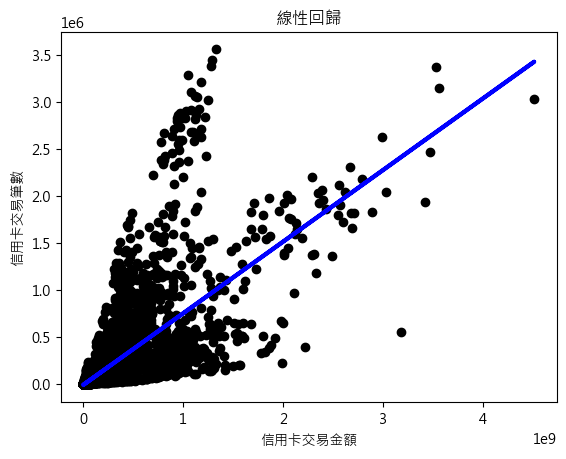

In [18]:
# 引入必要的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"
# 讀取資料集
df = pd.read_csv("../processed_dataset.csv")  #未排除未滿20歲

# 假設 '信用卡交易金額' 為特徵，'信用卡交易筆數' 為目標變數
X = df[["信用卡交易金額[新台幣]"]]
y = df["信用卡交易筆數"]

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# 印出評估指標
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# 繪製散點圖和回歸線
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("信用卡交易金額")
plt.ylabel("信用卡交易筆數")
plt.title("線性回歸")
plt.show()

In [19]:
import numpy as np

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(y_test, y_pred)[0, 1]

# Print the correlation coefficient
print(f"Correlation Coefficient between y_test and y_pred: {correlation_coefficient}")


Correlation Coefficient between y_test and y_pred: 0.7457889724270033


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117936 entries, 0 to 117935
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             117936 non-null  int64 
 1   月             117936 non-null  int64 
 2   地區            117936 non-null  object
 3   產業別           117936 non-null  object
 4   性別            117936 non-null  object
 5   年齡層           117936 non-null  object
 6   信用卡交易筆數       117936 non-null  int64 
 7   信用卡交易金額[新台幣]  117936 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.2+ MB


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 讀取資料集
df = pd.read_csv('../processed_dataset.csv')  # 請替換成你的實際檔案路徑

# 將 '年' 和 '月' 合併為日期欄位
df['日期'] = pd.to_datetime(df[['年', '月']].assign(DAY=1), format='%Y-%m-%d')

# 計算月度成長率
df['月度成長率'] = df.groupby('年')['信用卡交易筆數'].pct_change() * 100

# 刪除 NaN 值（第一個月的成長率會是 NaN）
df = df.dropna()

# 假設現在你想預測下一個月的成長率
# 你可以使用前幾個月的成長率來建立模型

# 設定特徵（X）和目標變數（y）
X = df[['月度成長率']]
y = df['月度成長率'].shift(-1)  # 將目標變數往前移動一個月，表示預測下一個月的成長率

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 印出評估指標
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month,year] is missing